In [ ]:
# https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb 에서 발췌

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 17606, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 17606 (delta 24), reused 43 (delta 7), pack-reused 17523
Receiving objects: 100% (17606/17606), 21.24 MiB | 28.93 MiB/s, done.
Resolving deltas: 100% (12227/12227), done.


In [ ]:
!cd mmdetection; python setup.py install

running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
reading manifest template 'MANIFEST.in'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mmdet
copying mmdet/__init__.py -> build/lib/mmdet
copying mmdet/version.py -> build/lib/mmdet
creating build/lib/mmdet/core
copying mmdet/core/__init__.py -> build/lib/mmdet/core
creating build/lib/mmdet/datasets
copying mmdet/datasets/coco.py -> build/lib/mmdet/datasets
copying mmdet/datasets/xml_style.py -> build/lib/mmdet/datasets
copying mmdet/datasets/cityscapes.

In [ ]:
# mmcv를 위해서 mmcv-full을 먼저 설치해야 함. 
!pip install mmcv-full

     |████████████████████████████████| 296kB 8.0MB/s 
     |████████████████████████████████| 194kB 14.8MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.4-cp37-cp37m-linux_x86_64.whl size=26350889 sha256=5d3d6091f827d0f4bd7791dbe84f116d5dd992aad624cd32536bf0ebe40a8390
  Stored in directory: /root/.cache/pip/wheels/d4/39/64/573a0673de0ee0c6b699dddfae8232d485ea8da749caa198fd
Successfully built mmcv-full


In [ ]:
# 아래를 수행하기 전에 kernel을 restart 해야 함. 
from mmdet.apis import init_detector, inference_detector
import mmcv

### Raccoon Dataset 다운로드
* Raccoon Dataset은 PASCAL VOC 형태의 Annotation을 가짐. 
* 한개의 이미지 파일에 대해서 매핑되는 한개의 annotation xml 파일을 가짐. 

In [ ]:
!git clone https://github.com/experiencor/raccoon_dataset.git raccoon
!ls -lia

Cloning into 'raccoon'...
remote: Enumerating objects: 646, done.
remote: Total 646 (delta 0), reused 0 (delta 0), pack-reused 646
Receiving objects: 100% (646/646), 48.00 MiB | 32.15 MiB/s, done.
Resolving deltas: 100% (412/412), done.
total 24
2097226 drwxr-xr-x  1 root root 4096 May 17 05:48 .
3565292 drwxr-xr-x  1 root root 4096 May 17 05:31 ..
2359325 drwxr-xr-x  4 root root 4096 May  6 13:43 .config
   8314 drwxr-xr-x 17 root root 4096 May 17 05:35 mmdetection
2649862 drwxr-xr-x  7 root root 4096 May 17 05:48 raccoon
2097227 drwxr-xr-x  1 root root 4096 May  6 13:44 sample_data


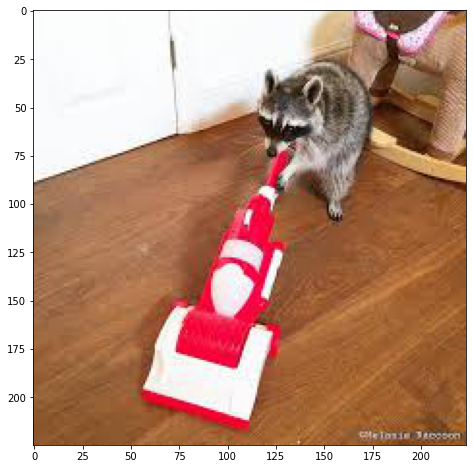

In [ ]:
import mmcv
import matplotlib.pyplot as plt
import cv2

img = cv2.cvtColor(cv2.imread('/content/raccoon/images/raccoon-171.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img)

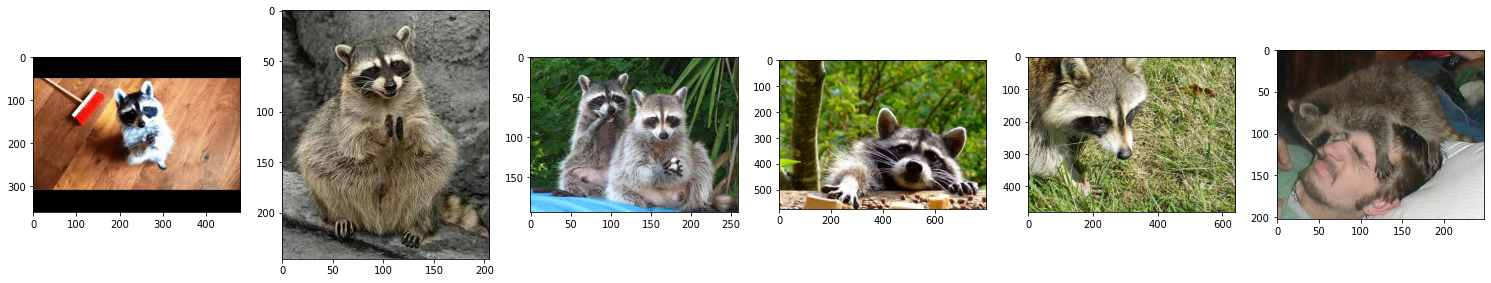

In [ ]:
import os

def show_images(image_files, ncols=6):
    figure, axs = plt.subplots(figsize=(26, 8), nrows=1, ncols=ncols)
    for i in range(ncols):
      image = cv2.cvtColor(cv2.imread(image_files[i]), cv2.COLOR_BGR2RGB)
      axs[i].imshow(image)

image_files = ['/content/raccoon/images/' + image_file for image_file in os.listdir('/content/raccoon/images')]
show_images(image_files[:8], ncols=6)

### Raccoon Dataset Annotation XML 조회

In [ ]:
!cat /content/raccoon/annotations/raccoon-177.xml

<annotation verified="yes">
	<folder>images</folder>
	<filename>raccoon-177.jpg</filename>
	<path>/Users/datitran/Desktop/raccoon/images/raccoon-177.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>276</width>
		<height>183</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>raccoon</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>8</xmin>
			<ymin>18</ymin>
			<xmax>157</xmax>
			<ymax>178</ymax>
		</bndbox>
	</object>
	<object>
		<name>raccoon</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>146</xmin>
			<ymin>13</ymin>
			<xmax>263</xmax>
			<ymax>146</ymax>
		</bndbox>
	</object>
</annotation>


### raccoon image/annotation 파일들의 리스트들을 가지는 파일 생성. 

In [ ]:
image_files = [image_file[:image_file.rfind('.jpg')] for image_file in os.listdir('/content/raccoon/images') if image_file.endswith('.jpg')]
print(image_files)

['raccoon-40', 'raccoon-69', 'raccoon-12', 'raccoon-112', 'raccoon-113', 'raccoon-163', 'raccoon-88', 'raccoon-127', 'raccoon-148', 'raccoon-137', 'raccoon-76', 'raccoon-19', 'raccoon-157', 'raccoon-37', 'raccoon-172', 'raccoon-31', 'raccoon-167', 'raccoon-53', 'raccoon-136', 'raccoon-64', 'raccoon-8', 'raccoon-67', 'raccoon-79', 'raccoon-196', 'raccoon-124', 'raccoon-49', 'raccoon-74', 'raccoon-185', 'raccoon-107', 'raccoon-48', 'raccoon-98', 'raccoon-120', 'raccoon-194', 'raccoon-35', 'raccoon-45', 'raccoon-162', 'raccoon-63', 'raccoon-70', 'raccoon-42', 'raccoon-93', 'raccoon-171', 'raccoon-118', 'raccoon-82', 'raccoon-109', 'raccoon-153', 'raccoon-141', 'raccoon-62', 'raccoon-151', 'raccoon-181', 'raccoon-72', 'raccoon-114', 'raccoon-30', 'raccoon-192', 'raccoon-94', 'raccoon-119', 'raccoon-38', 'raccoon-169', 'raccoon-131', 'raccoon-180', 'raccoon-130', 'raccoon-188', 'raccoon-110', 'raccoon-142', 'raccoon-125', 'raccoon-59', 'raccoon-191', 'raccoon-22', 'raccoon-139', 'raccoon-50

In [ ]:
import numpy as np

def make_file_from_list(image_files_list, target_file_name):
  with open(target_file_name, 'w') as f:
    for image_file in image_files_list:
      f.write(image_file+'\n')

def make_anno_files(image_files_arr, valid_ratio=0.2, test_ratio=0.0, target_dir='/content/raccoon/', random_seed = 2021):
  np.random.seed(0)
  np.random.shuffle(image_files_arr)

  total_cnt = len(image_files_arr)
  
  train_cnt = int((1 - test_ratio) * total_cnt)
  val_cnt = int(train_cnt * valid_ratio)
  tr_cnt = train_cnt - val_cnt
  
  tr_arr = image_files_arr[:tr_cnt]
  val_arr = image_files_arr[tr_cnt:train_cnt]
  test_arr = image_files_arr[train_cnt:]

  tr_target_file_name = target_dir + 'train.txt'
  val_target_file_name = target_dir + 'val.txt'
  test_target_file_name = target_dir + 'test.txt'

  make_file_from_list(tr_arr.tolist(), tr_target_file_name)
  make_file_from_list(val_arr.tolist(), val_target_file_name)
  make_file_from_list(test_arr.tolist(), test_target_file_name)


make_anno_files(np.array(image_files), valid_ratio=0.25, test_ratio=0.2, target_dir='/content/raccoon/', random_seed = 2021)

In [ ]:
!cat /content/raccoon/test.txt #|wc -l

### mmdetection의 중립 annotation 포맷 변환. 해당 포맷은 텍스트로 변환하지 않음. 바로 메모리 상의 list로 생성됨.  
#### filename, width, height, ann을 Key로 가지는 Dictionary를 이미지 개수대로 가지는 list 생성. 
* filename: 이미지 파일명(디렉토리는 포함하지 않음)
* width: 이미지 너비
* height: 이미지 높이
* ann: bbounding box와 label에 대한 정보를 가지는 Dictionary
 - bboxes: 하나의 이미지에 있는 여러 Object 들의 numpy array. 4개의 좌표값(좌상단, 우하단)을 가지고, 해당 이미지에 n개의 Object들이 있을 경우 array의 shape는 (n, 4)
 - labels: 하나의 이미지에 있는 여러 Object들의 numpy array. shape는 (n, )
 - bboxes_ignore: 학습에 사용되지 않고 무시하는 bboxes. 무시하는 bboxes의 개수가 k개이면 shape는 (k, 4)
 - labels_ignore: 학습에 사용되지 않고 무시하는 labels. 무시하는 bboxes의 개수가 k개이면 shape는 (k,)



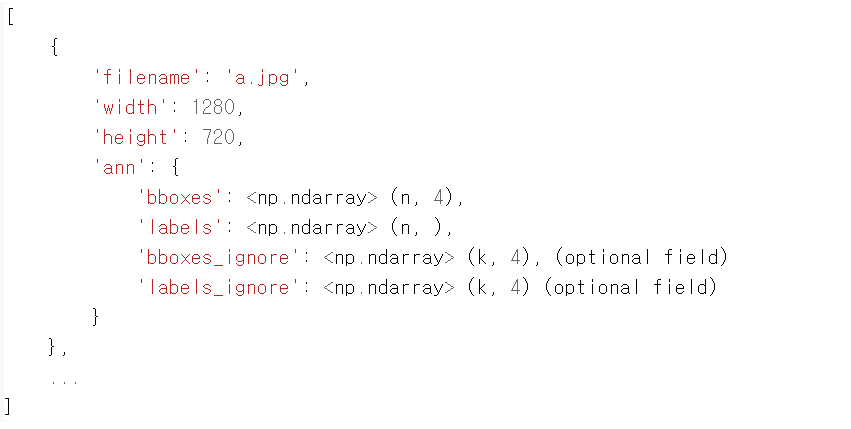

### Raccoon Dataset을 중립 데이터형태로 변환하여 메모리 로드

In [ ]:
CLASSES = ['Raccoon']
cat2label = {k:i for i, k in enumerate(CLASSES)}
print(cat2label)

{'Raccoon': 0}


In [ ]:
'{0:}/{1:}.jpeg'.format('test_dir', '000')

'test_dir/000.jpeg'

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

import xml.etree.ElementTree as ET

@DATASETS.register_module(force=True)
class RaccoonDataset(CustomDataset):
  CLASSES = ['raccoon']

  # annotation에 대한 모든 파일명을 가지고 있는 텍스트 파일을 __init__(self, ann_file)로 입력 받고, 이 self.ann_file이 load_annotations()의 인자로 입력
  # data_root = /content/raccoon/ 이 입력될 것임. 
  def load_annotations(self, ann_file):
    cat2label = {k:i for i, k in enumerate(self.CLASSES)}
    print('self.ann_file:', self.ann_file)
    image_list = mmcv.list_from_file(self.ann_file)
    # 포맷 중립 데이터를 담을 list 객체
    data_infos = []

    for image_id in image_list:
      print('start loop ######')
      # self.img_prefix는 images 가 입력될 것임. 
      filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
      print('####### filename:', filename)
      # 원본 이미지의 너비, 높이를 image를 직접 로드하여 구함. 
      image = cv2.imread(filename)
      height, width = image.shape[:2]
      # 개별 image의 annotation 정보 저장용 Dict 생성. key값 filename에는 image의 파일명만 들어감(디렉토리는 제외)
      data_info = {'filename': str(image_id) + '.jpg',
                   'width': width, 'height': height}
      # 개별 annotation이 있는 서브 디렉토리의 prefix 변환. 
      label_prefix = self.img_prefix.replace('images', 'annotations')
      # 개별 annotation 파일을 1개 line 씩 읽어서 list 로드 
      anno_xml_file = osp.join(label_prefix, str(image_id)+'.xml')

      bbox_names, bboxes = get_bboxes_from_xml(anno_xml_file)
      print('#########:', bbox_names)
      # 클래스명이 해당 사항이 없는 대상 Filtering out, 'DontCare'sms ignore로 별도 저장.
      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []

      for bbox_name, bbox in zip(bbox_names, bboxes):
        # 만약 bbox_name이 클래스명에 해당 되면, gt_bboxes와 gt_labels에 추가, 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
        # bbox_name이 CLASSES중에 반드시 하나 있어야 함. 안 그러면 FILTERING 되므로 주의 할것. 
        if bbox_name in cat2label:
          gt_bboxes.append(bbox)
          # gt_labels에는 class id를 입력
          gt_labels.append(cat2label[bbox_name])
        else:
          gt_bboxes_ignore.append(bbox)
          gt_labels_ignore.append(-1)
      # 개별 image별 annotation 정보를 가지는 Dict 생성. 해당 Dict의 value값은 모두 np.array임. 
      data_anno = {
          'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
          'labels': np.array(gt_labels, dtype=np.long),
          'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
          'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }
      # image에 대한 메타 정보를 가지는 data_info Dict에 'ann' key값으로 data_anno를 value로 저장. 
      data_info.update(ann=data_anno)
      # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
      data_infos.append(data_info)
      print(data_info)

    return data_infos


In [ ]:
# 1개의 annotation 파일에서 bbox 정보 추출. 여러개의 object가 있을 경우 이들 object의 name과 bbox 좌표들을 list로 반환.
def get_bboxes_from_xml(xml_file):
  tree = ET.parse(xml_file)
  root = tree.getroot()
  bbox_names = []
  bboxes = []
  # 파일내에 있는 모든 object Element를 찾음. 
  for obj in root.findall('object'):

    bbox_name = obj.find('name').text
    xmlbox = obj.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bbox_names.append(bbox_name)
    bboxes.append([x1, y1, x2, y2])

  return bbox_names, bboxes

In [ ]:
from mmcv import Config

cfg = Config.fromfile('/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=d

In [ ]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'RaccoonDataset'
cfg.data_root = '/content/raccoon/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'RaccoonDataset'
cfg.data.train.data_root = '/content/raccoon/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'RaccoonDataset'
cfg.data.val.data_root = '/content/raccoon/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

cfg.data.test.type = 'RaccoonDataset'
cfg.data.test.data_root = '/content/raccoon/'
cfg.data.test.ann_file = 'val.txt'
cfg.data.test.img_prefix = 'images'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 1
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        los

### Config에서 설정한 Dataset과 Model, 동적 학습율, Pipeline 설정에 따라 모델 학습 수행. 

* train용 Dataset을 생성하고 이를 이용하여 학습 수행. 

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성. 
datasets = [build_dataset(cfg.data.train)]

self.ann_file: /content/raccoon/train.txt
start loop ######
####### filename: /content/raccoon/images/raccoon-136.jpg
#########: ['raccoon']
{'filename': 'raccoon-136.jpg', 'width': 256, 'height': 197, 'ann': {'bboxes': array([[ 51.,  24., 198., 192.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}
start loop ######
####### filename: /content/raccoon/images/raccoon-85.jpg
#########: ['raccoon']
{'filename': 'raccoon-85.jpg', 'width': 620, 'height': 465, 'ann': {'bboxes': array([[236.,  87., 598., 429.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}
start loop ######
####### filename: /content/raccoon/images/raccoon-138.jpg
#########: ['raccoon']
{'filename': 'raccoon-138.jpg', 'width': 259, 'height': 194, 'ann': {'bboxes': array([[ 56.,  54., 226., 150.]], dtype=float32), 'labels': array([0]), 'bboxes_igno

/usr/local/lib/python3.7/dist-packages/mmdet-2.12.0-py3.7.egg/mmdet/datasets/custom.py:156: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


In [ ]:
datasets

[
 RaccoonDataset Train dataset with number of images 120, and instance counts: 
 +----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
 | category | count | category | count | category | count | category | count | category | count |
 +----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+]

In [ ]:
!cd /content/mmdetection; mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O /content/mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-05-17 07:56:28--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:80... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



In [ ]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

/usr/local/lib/python3.7/dist-packages/mmdet-2.12.0-py3.7.egg/mmdet/models/backbones/resnet.py:400: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


In [ ]:
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets, cfg, distributed=False, validate=True)

self.ann_file: /content/raccoon/val.txt
start loop ######
####### filename: /content/raccoon/images/raccoon-31.jpg
#########: ['raccoon', 'raccoon']
{'filename': 'raccoon-31.jpg', 'width': 236, 'height': 214, 'ann': {'bboxes': array([[ 82.,  21., 187., 197.],
       [ 11.,  55.,  80., 145.]], dtype=float32), 'labels': array([0, 0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}
start loop ######
####### filename: /content/raccoon/images/raccoon-177.jpg
#########: ['raccoon', 'raccoon']
{'filename': 'raccoon-177.jpg', 'width': 276, 'height': 183, 'ann': {'bboxes': array([[  8.,  18., 157., 178.],
       [146.,  13., 263., 146.]], dtype=float32), 'labels': array([0, 0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}
start loop ######
####### filename: /content/raccoon/images/raccoon-15.jpg
#########: ['raccoon']
{'filename': 'raccoon-15.jpg', 'width': 640, 'height': 360, 'ann': {'bbo

2021-05-17 07:56:32,986 - mmdet - INFO - load checkpoint from /content/mmdetection/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
2021-05-17 07:56:32,990 - mmdet - INFO - Use load_from_local loader
2021-05-17 07:56:33,129 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current

{'filename': 'raccoon-107.jpg', 'width': 500, 'height': 622, 'ann': {'bboxes': array([[165.,  51., 496., 590.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}


2021-05-17 07:56:39,934 - mmdet - INFO - Epoch [1][10/61]	lr: 2.500e-03, eta: 0:07:52, time: 0.654, data_time: 0.228, memory: 3773, loss_rpn_cls: 0.0052, loss_rpn_bbox: 0.0093, loss_cls: 0.1885, acc: 95.0000, loss_bbox: 0.1183, loss: 0.3213
2021-05-17 07:56:44,420 - mmdet - INFO - Epoch [1][20/61]	lr: 2.500e-03, eta: 0:06:32, time: 0.448, data_time: 0.031, memory: 3773, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0107, loss_cls: 0.0642, acc: 97.3145, loss_bbox: 0.1085, loss: 0.1857
2021-05-17 07:56:49,165 - mmdet - INFO - Epoch [1][30/61]	lr: 2.500e-03, eta: 0:06:07, time: 0.470, data_time: 0.033, memory: 3773, loss_rpn_cls: 0.0051, loss_rpn_bbox: 0.0082, loss_cls: 0.0404, acc: 98.5059, loss_bbox: 0.1121, loss: 0.1658
2021-05-17 07:56:54,013 - mmdet - INFO - Epoch [1][40/61]	lr: 2.500e-03, eta: 0:05:55, time: 0.485, data_time: 0.039, memory: 3773, loss_rpn_cls: 0.0414, loss_rpn_bbox: 0.0165, loss_cls: 0.0595, acc: 97.9102, loss_bbox: 0.1143, loss: 0.2317
2021-05-17 07:56:58,792 - mmdet - IN

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 40/40, 8.0 task/s, elapsed: 5s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-05-17 08:02:44,693 - mmdet - INFO - 
+---------+-----+------+--------+-------+
| class   | gts | dets | recall | ap    |
+---------+-----+------+--------+-------+
| raccoon | 43  | 58   | 0.953  | 0.949 |
+---------+-----+------+--------+-------+
| mAP     |     |      |        | 0.949 |
+---------+-----+------+--------+-------+
2021-05-17 08:02:44,699 - mmdet - INFO - Saving checkpoint at 12 epochs
2021-05-17 08:02:45,748 - mmdet - INFO - Epoch(val) [12][61]	AP50: 0.9490, mAP: 0.9492


In [ ]:
!ls -lia /content/mmdetection/checkpoints

total 173708
8509 drwxr-xr-x  2 root root      4096 May 17 07:32 .
8314 drwxr-xr-x 18 root root      4096 May 17 07:32 ..
3743 -rw-r--r--  1 root root 177867103 Aug 31  2020 mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


### 학습된 model을 이용하여 inference 수행. 

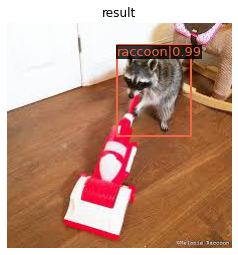

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# 입력 시 RGB가 아니라 BGR 그대로 입력 
img = cv2.imread('/content/raccoon/images/raccoon-171.jpg')

model.cfg = cfg

result = inference_detector(model, img)
# BGR->RGB 로 변환됨. 
show_result_pyplot(model, img, result)

In [ ]:
result

[array([], shape=(0, 5), dtype=float32)]